# Binary Classification example

Fisrt we import keras library and spesifically from the keras.datasets the imdb command which contains our data. We also import all the other necessary libraries.

In [1]:
from keras.datasets import imdb
from keras import models
from keras import layers
import numpy as np

Next we load the imdb data to train data with their labels and to test data with their labels.
The total number of data is 50.000 and their split in half to train and test data. Also each subset of data has equal number of positive and negative reviews.

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Follows the first sample of data which a list of numbers (features) where each number correspond to a word of dictionary.

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

Next follows the label of the first sample of the training data. The label is an integer number 0 or 1 which notates whether the sample is a positive 1 review or a negative 0 review.

In [4]:
train_labels[0]

1

How to decode one of the reviews back to english.

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Prepearing the data
We must turn the lists to tensors to input them to the neural network.
You can’t feed lists of integers into a neural network. You have to turn your lists into
tensors. There are two ways to do that:
* Pad your lists so that they all have the same length, turn them into an integer
tensor of shape (samples, word_indices), and then use as the first layer in
your network a layer capable of handling such integer tensors (the Embedding
layer, which we’ll cover in detail later in the book).
* One-hot encode your lists to turn them into vectors of 0s and 1s. This would
mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector
that would be all 0s except for indices 3 and 5, which would be 1s. Then you
could use as the first layer in your network a Dense layer, capable of handling
floating-point vector data.

Let’s go with the latter solution to vectorize the data, which you’ll do manually for
maximum clarity.

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Cosequnetly, the data samples look like this.

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Furthermore, we vectorize the labels too.

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Data is ready to be fed to the neural network.
A type of network that performs well on such a problem is
a simple stack of fully connected (Dense) layers with relu activations: Dense(16, activation='relu').

The argument being passed to each Dense layer (16) is the number of hidden
units of the layer. A hidden unit is a dimension in the representation space of the layer.
You may remember from chapter 2 that each such Dense layer with a relu activation
implements the following chain of tensor operations:

output = relu(dot(W, input) + b)

There are two key architecture decisions to be made about such a stack of Dense layers:
* How many layers to use
* How many hidden units to choose for each layer

For this example the following architecture choices are:
* Two intermediate layers with 16 hidden units each
* A third layer that will output the scalar prediction regarding the sentiment of the current review

The intermediate layers will use relu as their activation function, and the final layer will use a sigmoid activation so as to output a probability. A relu (rectified linear unit) is a function meant to zero out negative values, whereas a sigmoid “squashes” arbitrary values into the [0, 1] interval, outputting something that can be interpreted as a probability.

In [10]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Finally we choose a loss function and an optimizer. Because we’re facing a
binary classification problem and the output of your network is a probability, it’s best to use the binary_crossentropy loss. Crossentropy is a quantity from the field of Information Theory that measures the distance between probability distributions or, in this case, between the ground-truth distribution and your predictions. And the optimizer we use is the rmsprop.

In [11]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

The optimizer, loss function and the metric we used exist as part of Keras. However when we want to configure parameters in optimizer or pass custom loss function and metrics we can use the following method.

In [12]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

## Validating approach

In order to monitor during training the accuracy of the model on data it has never seen before, you’ll create a validation set by setting apart 10,000 samples from the original training data.

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We tarin the model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors) in mini-baches of 512 samples. At the same time, we will monitor loss and accuracy on the 10000 samples. 

In [14]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5347 - acc: 0.7819 - val_loss: 0.4107 - val_acc: 0.8651
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3192 - acc: 0.8997 - val_loss: 0.3173 - val_acc: 0.8829
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2274 - acc: 0.9264 - val_loss: 0.3247 - val_acc: 0.8683
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1773 - acc: 0.9432 - val_loss: 0.2765 - val_acc: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1426 - acc: 0.9553 - val_loss: 0.3000 - val_acc: 0.8787
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1169 - acc: 0.9645 - val_loss: 0.3131 - val_acc: 0.8779
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0947 - acc: 0.9733 - val_loss: 0.3145 - val_acc: 0.8799
Epoch 8/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0755 - a

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

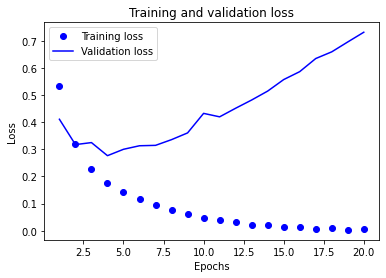

In [16]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

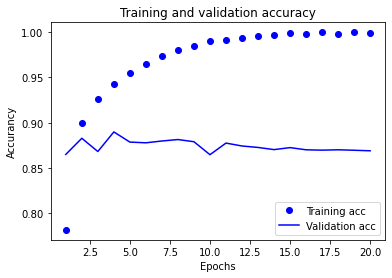

In [17]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accurancy')
plt.legend()
plt.show()

We notice that while the loss decreases and the accuracy increases for the training data monoticly the same is not true for the validation data. We observe that after the 4th epoch the loss instead of decreasing increases and the accuracy decreases. Through these observations it is apparent that the problem of overfitting is present. 

In this case to prevent overfitting we stop training the model after 4 epochs.

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 11ms/step - loss: 0.4784 - accuracy: 0.7951
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2668 - accuracy: 0.9069
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2046 - accuracy: 0.9268
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2949 - accuracy: 0.8836


In [19]:
results

[0.2949334979057312, 0.8835999965667725]

The accuracy achieved is of 88% with this naive approach. While with state pf the art approach is possible and 95%.

## Using a trained network on new data.

In [20]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.20654814],
       [0.9999925 ],
       [0.9373169 ],
       ...,
       [0.13589425],
       [0.11089706],
       [0.6203871 ]], dtype=float32)

## Further Experiments

* You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.
* Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.
* Try using the mse loss function instead of binary_crossentropy.
* Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.

## Regularization techniques

Let’s review some of the most common regularization techniques and apply them in practice to improve the movie-classification model.

We replace the model with a smaller network.

In [21]:
model2 = models.Sequential()
model2.add(layers.Dense(4,activation='relu',input_shape=(10000,)))
model2.add(layers.Dense(4,activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))

In [22]:
model2.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history2 = model2.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6001 - acc: 0.7718 - val_loss: 0.5249 - val_acc: 0.8205
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4527 - acc: 0.8752 - val_loss: 0.4224 - val_acc: 0.8657
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3598 - acc: 0.8981 - val_loss: 0.3598 - val_acc: 0.8774
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2966 - acc: 0.9126 - val_loss: 0.3222 - val_acc: 0.8844
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2511 - acc: 0.9246 - val_loss: 0.3019 - val_acc: 0.8855
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2172 - acc: 0.9328 - val_loss: 0.2836 - val_acc: 0.8920
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1907 - acc: 0.9409 - val_loss: 0.2751 - val_acc: 0.8918
Epoch 8/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1690 - a

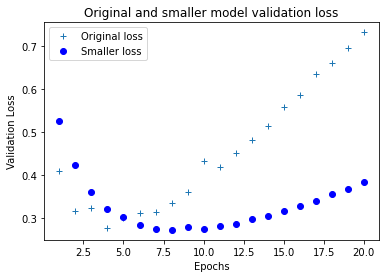

In [23]:
history2_dict = history2.history
history2_dict.keys()

loss_values_smaller = history2_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, val_loss_values, '+', label='Original loss')
plt.plot(epochs, loss_values_smaller, 'bo', label='Smaller loss')
plt.title('Original and smaller model validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

As we can see the smaller network starts overfitting later than the reference network (here after 7 epochs rather than four) and its performance degrades slowly once it starts overfitting.

Now lets add to this benchmark a network that has much more capacity.

In [24]:
model3 = models.Sequential()
model3.add(layers.Dense(512,activation='relu',input_shape=(10000,)))
model3.add(layers.Dense(512,activation='relu'))
model3.add(layers.Dense(1,activation='sigmoid'))

In [25]:
model3.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history3 = model3.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 7s 208ms/step - loss: 0.5361 - acc: 0.7505 - val_loss: 0.6217 - val_acc: 0.7089
Epoch 2/20
30/30 [==============================] - 3s 107ms/step - loss: 0.2590 - acc: 0.8973 - val_loss: 0.3143 - val_acc: 0.8635
Epoch 3/20
30/30 [==============================] - 3s 112ms/step - loss: 0.1490 - acc: 0.9431 - val_loss: 0.3782 - val_acc: 0.8683
Epoch 4/20
30/30 [==============================] - 3s 106ms/step - loss: 0.1001 - acc: 0.9692 - val_loss: 0.3773 - val_acc: 0.8888
Epoch 5/20
30/30 [==============================] - 3s 108ms/step - loss: 0.0125 - acc: 0.9967 - val_loss: 0.4913 - val_acc: 0.8771
Epoch 6/20
30/30 [==============================] - 3s 105ms/step - loss: 0.0015 - acc: 0.9998 - val_loss: 0.6221 - val_acc: 0.8782
Epoch 7/20
30/30 [==============================] - 3s 103ms/step - loss: 1.1533e-04 - acc: 1.0000 - val_loss: 0.7236 - val_acc: 0.8840
Epoch 8/20
30/30 [==============================] - 3s 103ms/step - loss

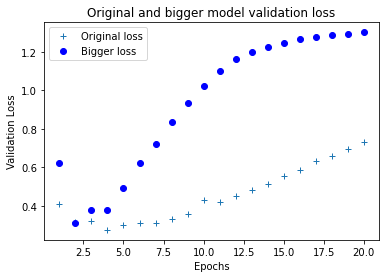

In [26]:
history3_dict = history3.history
history3_dict.keys()

loss_values_bigger = history3_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, val_loss_values, '+', label='Original loss')
plt.plot(epochs, loss_values_bigger, 'bo', label='Bigger loss')
plt.title('Original and bigger model validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

The bigger network starts overfitting almost immediately, after just one epoch, and it overfits much more severely.

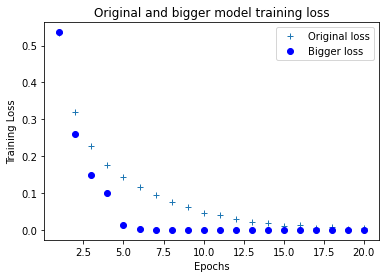

In [27]:
loss_values_bigger_t = history3_dict['loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, '+', label='Original loss')
plt.plot(epochs, loss_values_bigger_t, 'bo', label='Bigger loss')
plt.title('Original and bigger model training loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

The more capacity the network has, the more quickly it can model the training data (resulting in a low training loss), but the more susceptible it is to overfitting.

## Adding weight regularization

Α common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights to take only small values, which makes the distribution of weight values more regular. This is called weight regularization, and it’s done by adding to the loss function of the network a cost associated with having large weights. This cost comes in two flavors:
* L1 regularization—The cost added is proportional to the absolute value of the weight coefficients (the L1 norm of the weights).
* L2 regularization—The cost added is proportional to the square of the value of the weight coefficients (the L2 norm of the weights). L2 regularization is also called weight decay in the context of neural networks. Don’t let the different name confuse you: weight decay is mathematically the same as L2 regularization.

Now let’s add L2 weight regularization to the network.

In [28]:
from keras import regularizers

model4 = models.Sequential()
model4.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),
                       activation='relu',input_shape=(10000,)))
model4.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),
                      activation='relu'))
model4.add(layers.Dense(1,activation='sigmoid'))

In [29]:
model4.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history4 = model4.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5677 - acc: 0.7827 - val_loss: 0.4539 - val_acc: 0.8439
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3693 - acc: 0.8950 - val_loss: 0.3673 - val_acc: 0.8808
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2952 - acc: 0.9191 - val_loss: 0.3361 - val_acc: 0.8891
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2602 - acc: 0.9290 - val_loss: 0.3310 - val_acc: 0.8874
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2422 - acc: 0.9377 - val_loss: 0.3448 - val_acc: 0.8816
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2234 - acc: 0.9457 - val_loss: 0.3430 - val_acc: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2095 - acc: 0.9519 - val_loss: 0.3858 - val_acc: 0.8722
Epoch 8/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2075 - a

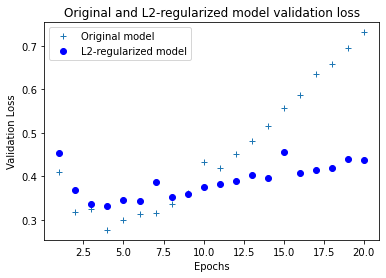

In [30]:
history4_dict = history4.history
history4_dict.keys()

loss_values_L2reg = history4_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, val_loss_values, '+', label='Original model')
plt.plot(epochs, loss_values_L2reg, 'bo', label='L2-regularized model')
plt.title('Original and L2-regularized model validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

As an alternative to L2 regularization, you can use one of the following Keras weight regularizers.

from keras import regularizers

regularizers.l1(0.001)

regularizers.l1_l2(l1=0.001, l2=0.001)

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 1.1002 - acc: 0.6893 - val_loss: 0.7543 - val_acc: 0.8114
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.7125 - acc: 0.8167 - val_loss: 0.6925 - val_acc: 0.8532
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6520 - acc: 0.8443 - val_loss: 0.6355 - val_acc: 0.8538
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6087 - acc: 0.8557 - val_loss: 0.6051 - val_acc: 0.8574
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5795 - acc: 0.8627 - val_loss: 0.5898 - val_acc: 0.8512
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5610 - acc: 0.8661 - val_loss: 0.5763 - val_acc: 0.8590
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5530 - acc: 0.8626 - val_loss: 0.5665 - val_acc: 0.8608
Epoch 8/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5403 - a

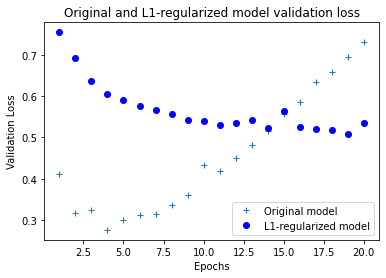

In [31]:
model5 = models.Sequential()
model5.add(layers.Dense(16,kernel_regularizer=regularizers.l1(0.001),
                       activation='relu',input_shape=(10000,)))
model5.add(layers.Dense(16,kernel_regularizer=regularizers.l1(0.001),
                      activation='relu'))
model5.add(layers.Dense(1,activation='sigmoid'))

model5.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history5 = model5.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

history5_dict = history5.history
history5_dict.keys()

loss_values_L1reg = history5_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, val_loss_values, '+', label='Original model')
plt.plot(epochs, loss_values_L1reg, 'bo', label='L1-regularized model')
plt.title('Original and L1-regularized model validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 5s 37ms/step - loss: 1.0829 - acc: 0.7578 - val_loss: 0.7197 - val_acc: 0.8059
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6595 - acc: 0.8485 - val_loss: 0.6339 - val_acc: 0.8613
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6042 - acc: 0.8659 - val_loss: 0.6163 - val_acc: 0.8498
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5749 - acc: 0.8717 - val_loss: 0.5983 - val_acc: 0.8500
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5558 - acc: 0.8728 - val_loss: 0.5609 - val_acc: 0.8685
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5465 - acc: 0.8731 - val_loss: 0.5750 - val_acc: 0.8538
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5372 - acc: 0.8781 - val_loss: 0.5426 - val_acc: 0.8718
Epoch 8/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5214 - a

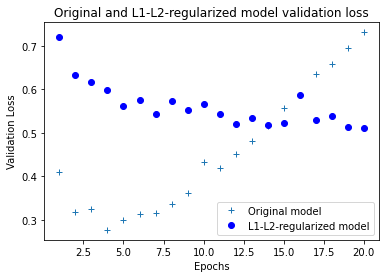

In [32]:
model6 = models.Sequential()
model6.add(layers.Dense(16,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),
                       activation='relu',input_shape=(10000,)))
model6.add(layers.Dense(16,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),
                      activation='relu'))
model6.add(layers.Dense(1,activation='sigmoid'))

model6.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history6 = model6.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

history6_dict = history6.history
history6_dict.keys()

loss_values_L1L2reg = history6_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, val_loss_values, '+', label='Original model')
plt.plot(epochs, loss_values_L1L2reg, 'bo', label='L1-L2-regularized model')
plt.title('Original and L1-L2-regularized model validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

## Adding dropout

Dropout is one of the most effective and most commonly used regularization techniques for neural networks. Dropout, applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training. Let’s say a given layer would normally return a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training. After applying dropout, this vector will have a few zero entries distributed at random: for example, [0, 0.5, 1.3, 0, 1.1]. The dropout rate is the fraction of the features that are zeroed out; it’s usually set between 0.2 and 0.5. At test time, no units are dropped out; instead, the layer’s output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time.

In Keras, you can introduce dropout in a network via the Dropout layer, which is applied to the output of the layer right before it:

model.add(layers.Dropout(0.5))

Let’s add two Dropout layers.

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.6260 - acc: 0.6384 - val_loss: 0.4875 - val_acc: 0.8466
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4815 - acc: 0.7763 - val_loss: 0.3621 - val_acc: 0.8774
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4002 - acc: 0.8345 - val_loss: 0.3202 - val_acc: 0.8871
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3399 - acc: 0.8753 - val_loss: 0.2875 - val_acc: 0.8857
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2943 - acc: 0.8977 - val_loss: 0.2782 - val_acc: 0.8900
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2568 - acc: 0.9117 - val_loss: 0.2757 - val_acc: 0.8878
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2243 - acc: 0.9240 - val_loss: 0.3390 - val_acc: 0.8785
Epoch 8/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2043 - a

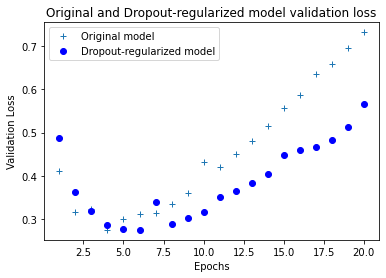

In [34]:
model7 = models.Sequential()
model7.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model7.add(layers.Dropout(0.5))
model7.add(layers.Dense(16, activation='relu'))
model7.add(layers.Dropout(0.5))
model7.add(layers.Dense(1,activation='sigmoid'))

model7.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history7 = model7.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

history7_dict = history7.history
history7_dict.keys()

loss_values_drop = history7_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, val_loss_values, '+', label='Original model')
plt.plot(epochs, loss_values_drop, 'bo', label='Dropout-regularized model')
plt.title('Original and Dropout-regularized model validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

Τhis is a clear improvement over the reference network.